In [1]:
"""Tests for `pydeseq2` package."""

'Tests for `pydeseq2` package.'

In [26]:
import unittest
import ipytest

ipytest.config(rewrite_asserts=True, magics=True)

__file__="pytest_for_deseq2.ipynb"

In [27]:
#python packages
import pydeseq2

import numpy as np
import pandas as pd
import os.path
import os

In [28]:
#rpy2 packages
jupiter_dir="/jupyterminiconda3" #name of the directory in which conda is saved
from pathlib import Path
home = str(Path.home())
os.environ['R_HOME']=os.path.join(home + jupiter_dir + "/envs/pyDESeq2_env/lib/R/")

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro

system_file = robjects.r['system.file']

In [29]:
##definition of functions and objects
def importCts(pathCts):
    """imort count matrix as pandas df"""
    cts=pd.read_table(pathCts[0], sep="\t", header=0, index_col=0, dtype="str")
    cts=cts.apply(pd.to_numeric)
    return cts

def importColdata(pathColdata, pathCts):
    """imort sample annotation as pandas df"""
    coldata=pd.read_csv(pathColdata[0],index_col=0) #import coldata information
    coldata.index=coldata.index.str.replace(r'fb$', '')
    coldata=coldata.loc[importCts(pathCts).columns]
    return coldata

def convertPandas(cts, coldata):
    """converti pandas df in r dataframe"""
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_cts = ro.conversion.py2rpy(cts)
        
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_coldata = ro.conversion.py2rpy(coldata)
    
    return r_cts, r_coldata

In [30]:
##Load objects
##Import cts and coldata
cts=importCts(system_file("extdata", "pasilla_gene_counts.tsv", package="pasilla", mustWork=True))
coldata=importColdata(system_file("extdata", "pasilla_sample_annotation.csv", package="pasilla", mustWork=True), system_file("extdata", "pasilla_gene_counts.tsv", package="pasilla", mustWork=True))
r_cts, r_coldata=convertPandas(cts, coldata)

#create dds and rld obj
dds=pydeseq2.pyDESeqDataSetFromMatrix(r_cts, r_coldata, design=Formula("~condition"))
rld=pydeseq2.pyrlogTransformation(dds)

#libsize df
libSize_df=pydeseq2.pyCreateLibSizedf(dds, coldata=coldata)

#res 
contrast=np.array(['condition','treated', 'untreated']) #set the constrast
res, res_df=pydeseq2.pyresults(dds, contrast=contrast, alpha=0.1, save=True)

dds does not exist, it will be created. Keep calm and wait.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



rld does not exist, it will be created. Keep calm and wait.


In [31]:
##test class methods
class Testpydeseq2(unittest.TestCase):
  
    def test_importCts(self):
        cts=importCts(system_file("extdata", "pasilla_gene_counts.tsv", package="pasilla", mustWork=True))
             
    def test_importColdata(self):
        coldata=importColdata(system_file("extdata", "pasilla_sample_annotation.csv", package="pasilla", mustWork=True), system_file("extdata", "pasilla_gene_counts.tsv", package="pasilla", mustWork=True))
        
    def test_convertPandas(self):
        r_cts, r_coldata=convertPandas(cts, coldata)
        
    def test_pyDESeqDataSetFromMatrix(self):
        dds=pydeseq2.pyDESeqDataSetFromMatrix(r_cts, r_coldata, design=Formula("~condition"))
    
    def test_pyrlogTransformation(self):
        rld=pydeseq2.pyrlogTransformation(dds)
        
    def test_pyrVarStabTionformation(self):
        vsd=pydeseq2.pyrVarStabTionformation(dds)
        
    def test_pyCreateLibSizedf(self):
        libSize_df=pydeseq2.pyCreateLibSizedf(dds, coldata=coldata)
    
    def test_pyPlotLibSizeFact(self):
        pydeseq2.pyPlotLibSizeFact(libSize_df)
    
    def test_pyPlotDispEsts(self):
        pydeseq2.pyPlotDispEsts(dds)
        
    def test_pymeanSdPlot(self):
        pydeseq2.pymeanSdPlot(dds)
        
    def test_pyPlotPCA(self):
        pydeseq2.pyPlotPCA(rld, intgroup_name=['type'])

    def test_pyPlotClustering(self):
        pydeseq2.pyPlotClustering(rld, coldata)
        
    def test_pyResDifferential(self):
        res, res_df=pydeseq2.pyresults(dds, contrast=contrast)
        
    def test_pyPlotMeannormCount_lg10pval(self):
        pydeseq2.pyPlotMeannormCount_lg10pval(res_df)
        
    def test_pyPlotFilterNumRej(self):
        pydeseq2.pyPlotFilterNumRej(res)
    
    def test_pyPlotHistpvalue(self):
        pydeseq2.pyPlotHistpvalue(res, res_df)
        
    def test_pyPlotMA(self):
        pydeseq2.pyPlotMA(res_df)
        
    def test_pyPlotVolcano(self):
        pydeseq2.pyPlotVolcano(res_df)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.1, py-1.8.1, pluggy-0.13.1 -- /mnt/home/gervasoni/jupyterminiconda3/envs/pyDESeq2_env/bin/python
cachedir: .pytest_cache
rootdir: /mnt/home/gervasoni/pydeseq2, inifile: setup.cfg
plugins: cov-2.8.1
collecting ... collected 18 items

pytest_for_deseq2.py::Testpydeseq2::test_convertPandas <- tests/<ipython-input-31-1629eba19f77> PASSED
pytest_for_deseq2.py::Testpydeseq2::test_importColdata <- tests/<ipython-input-31-1629eba19f77> PASSED
pytest_for_deseq2.py::Testpydeseq2::test_importCts <- tests/<ipython-input-31-1629eba19f77> PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyCreateLibSizedf <- tests/<ipython-input-31-1629eba19f77> PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyDESeqDataSetFromMatrix <- tests/<ipython-input-31-1629eba19f77> dds exists and it will be loaded
PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotClustering <- tests/<ipython-input-31

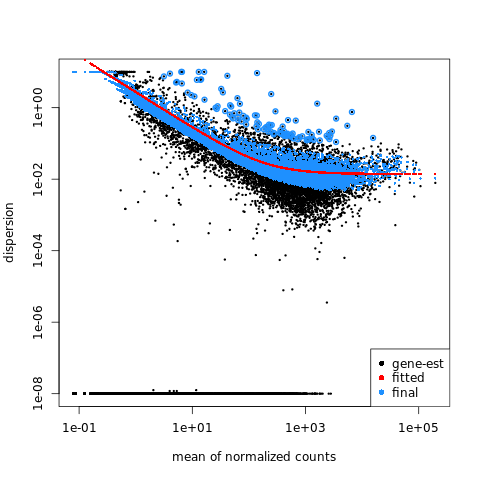

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotFilterNumRej <- tests/<ipython-input-31-1629eba19f77> 

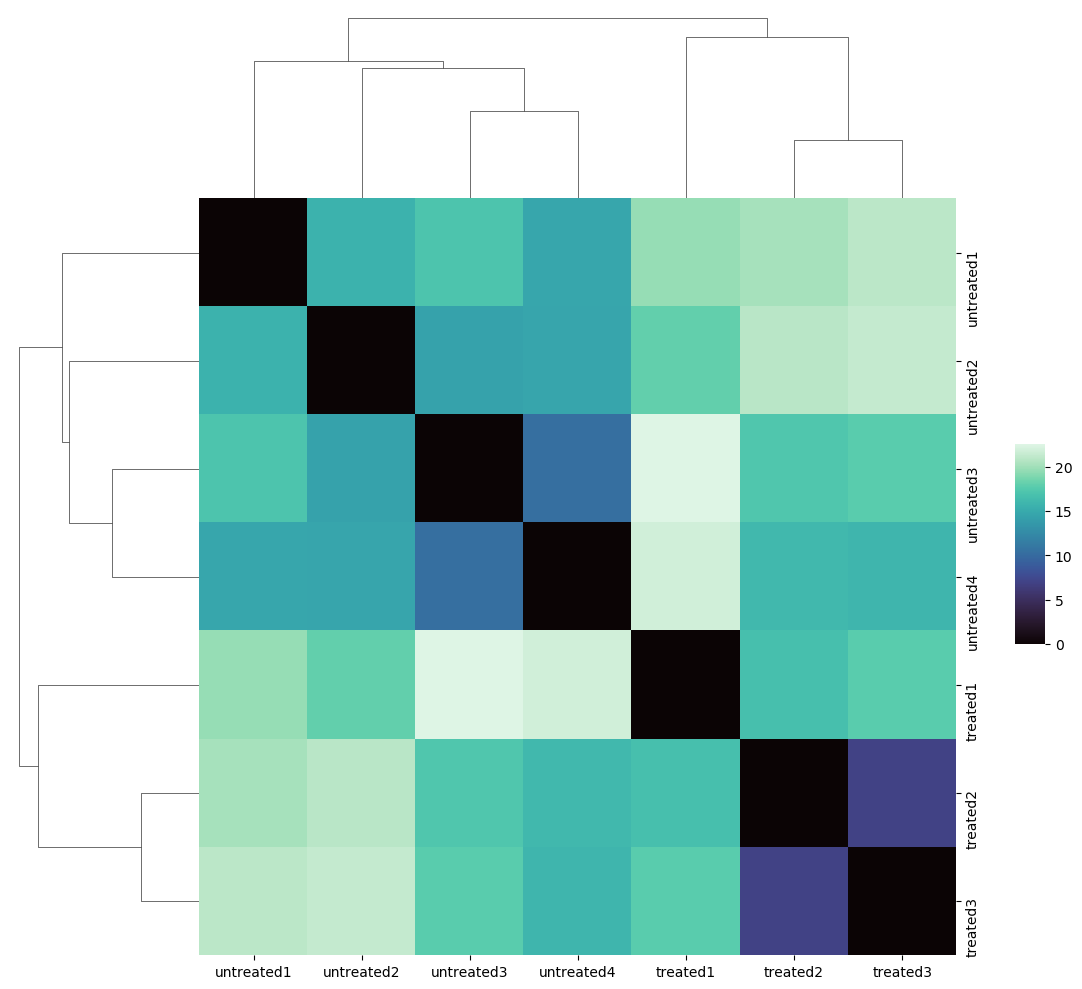

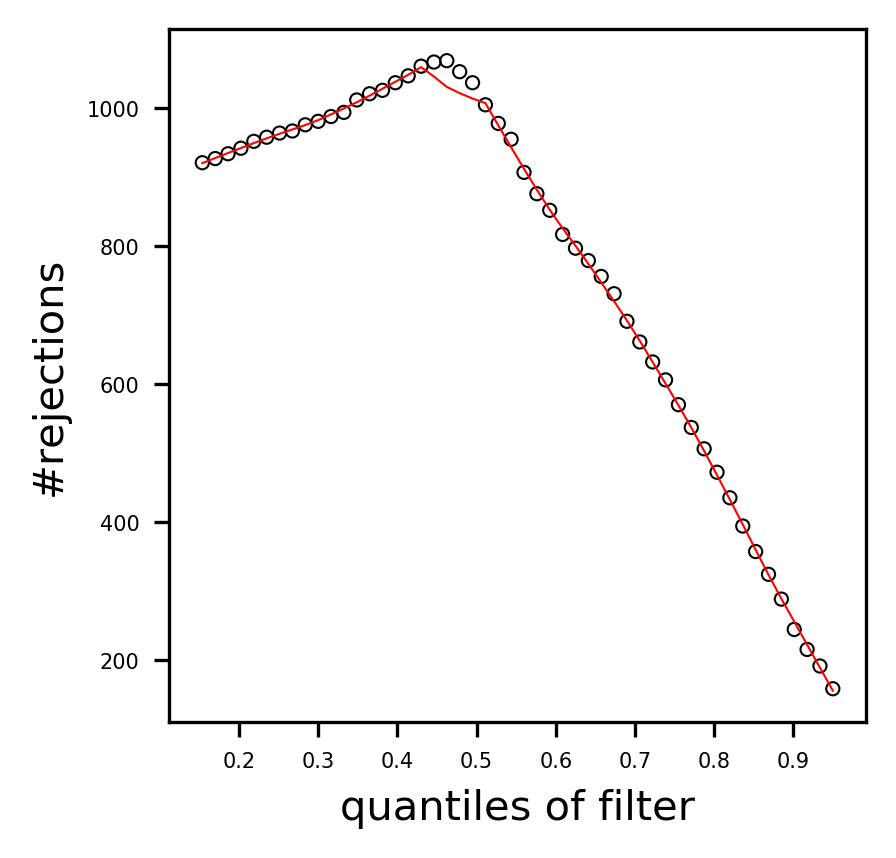

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotHistpvalue <- tests/<ipython-input-31-1629eba19f77> 

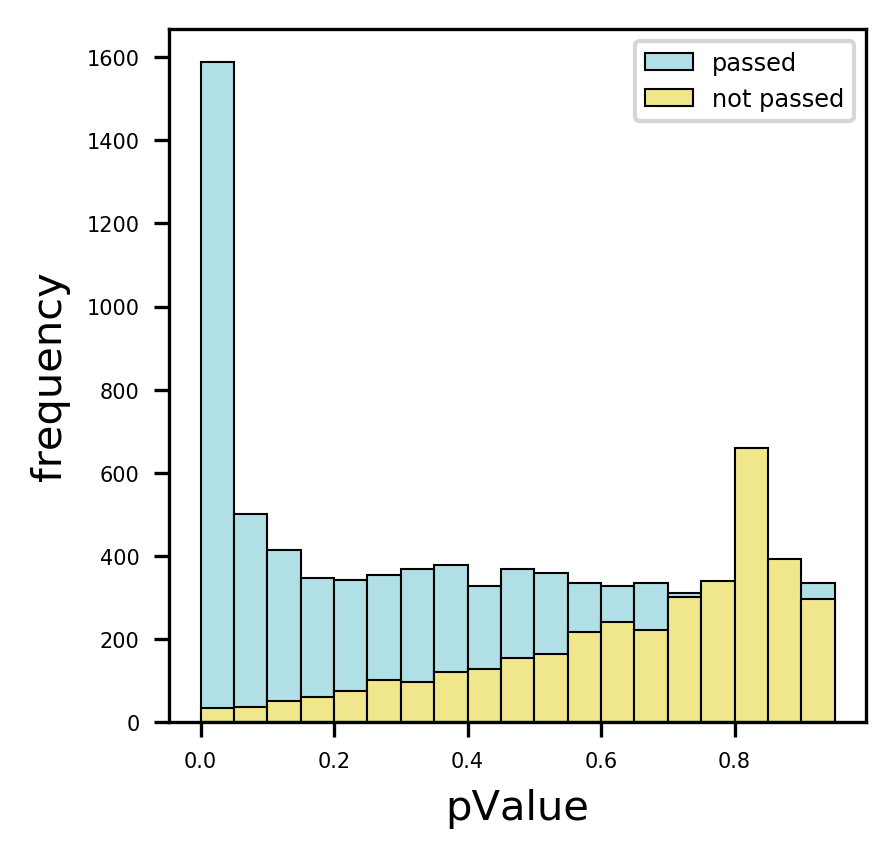

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotLibSizeFact <- tests/<ipython-input-31-1629eba19f77> 

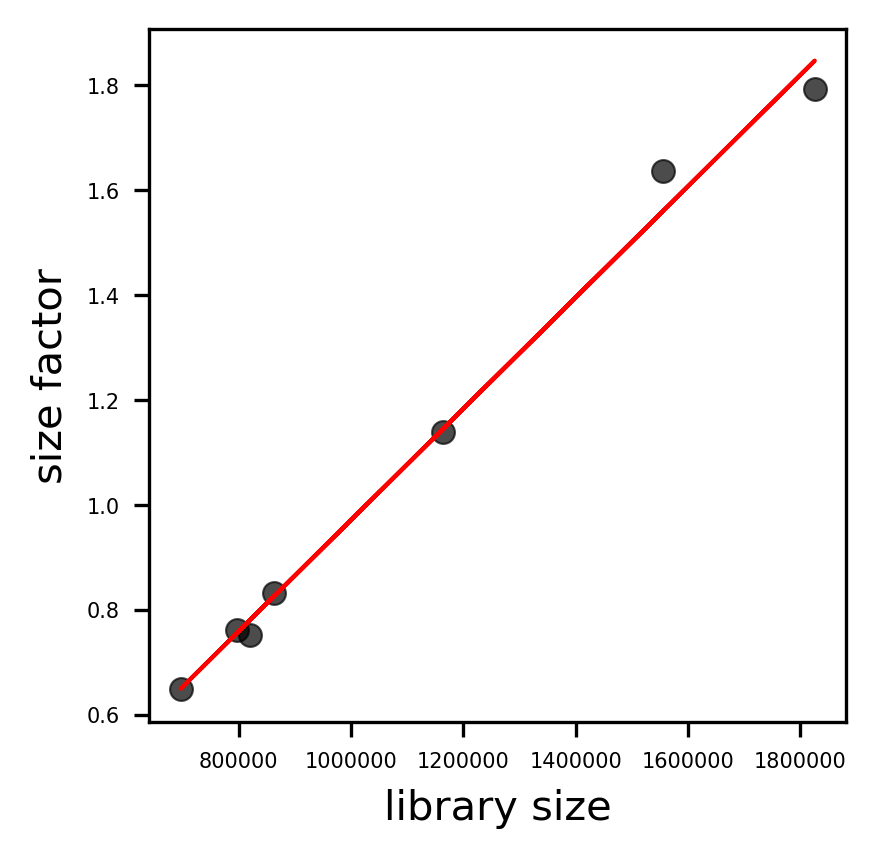

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotMA <- tests/<ipython-input-31-1629eba19f77> 

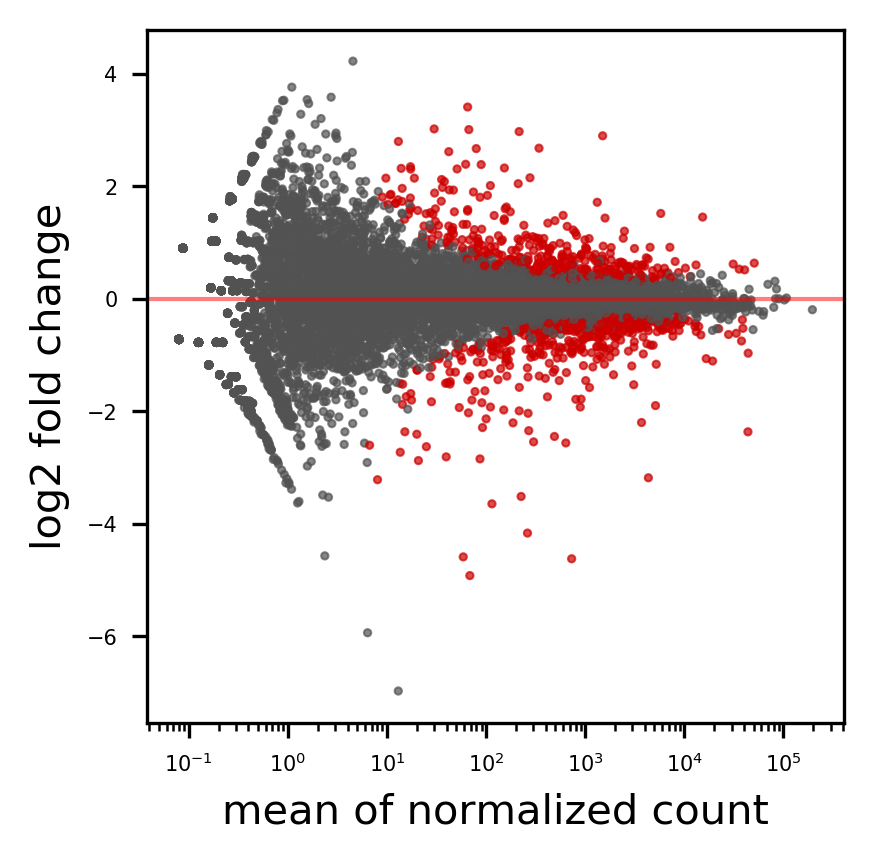

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotMeannormCount_lg10pval <- tests/<ipython-input-31-1629eba19f77> 

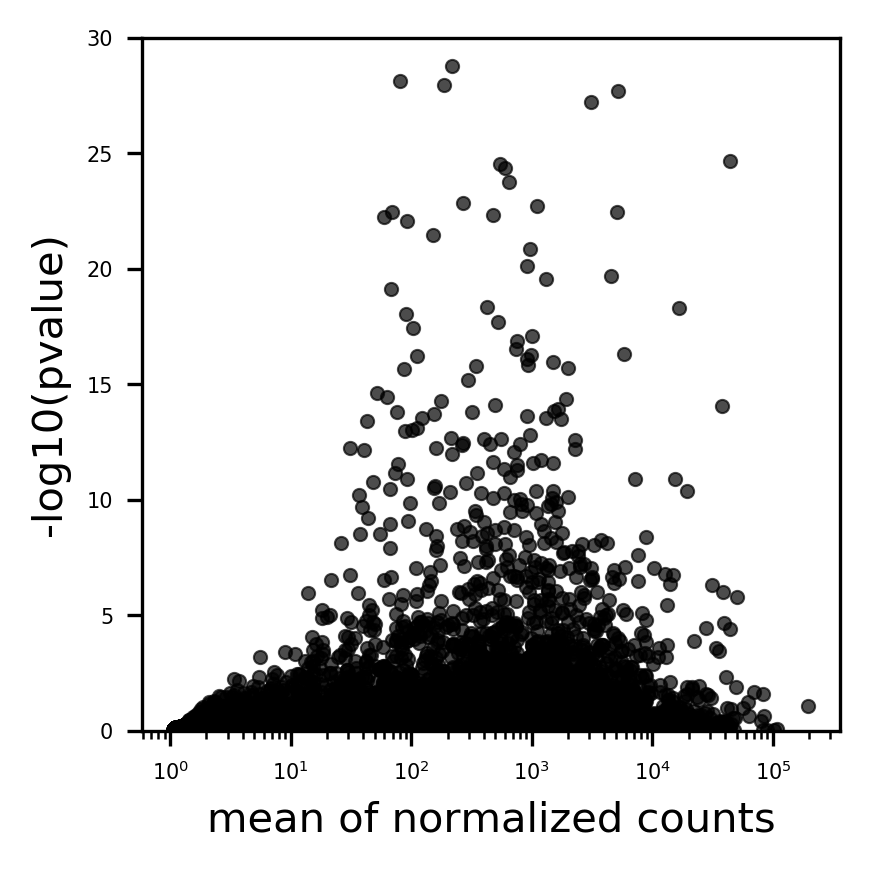

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotPCA <- tests/<ipython-input-31-1629eba19f77> 

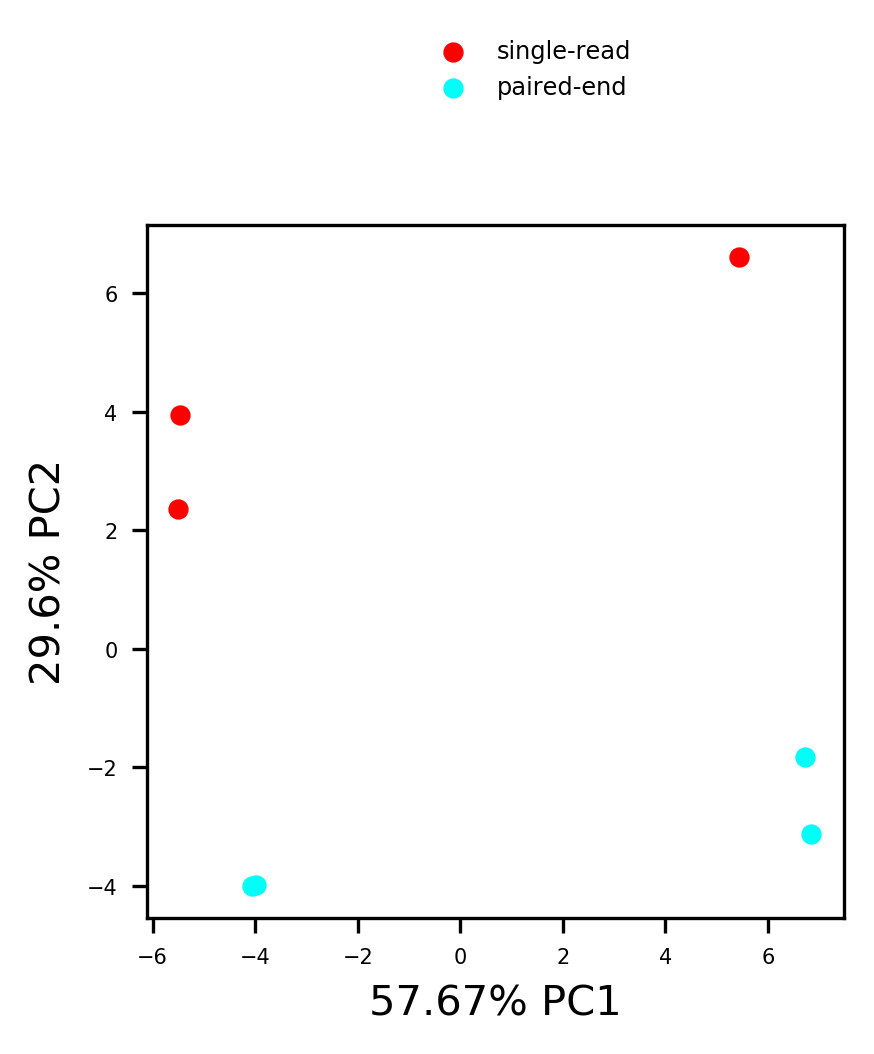

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyPlotVolcano <- tests/<ipython-input-31-1629eba19f77> 

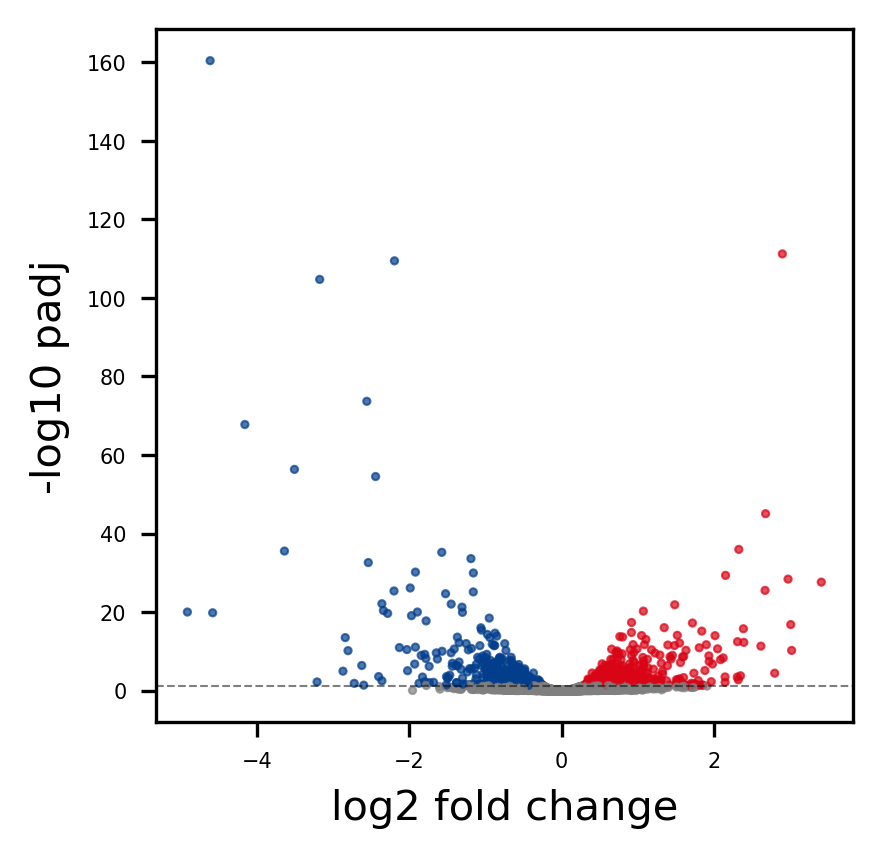

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyResDifferential <- tests/<ipython-input-31-1629eba19f77> PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pymeanSdPlot <- tests/<ipython-input-31-1629eba19f77> 

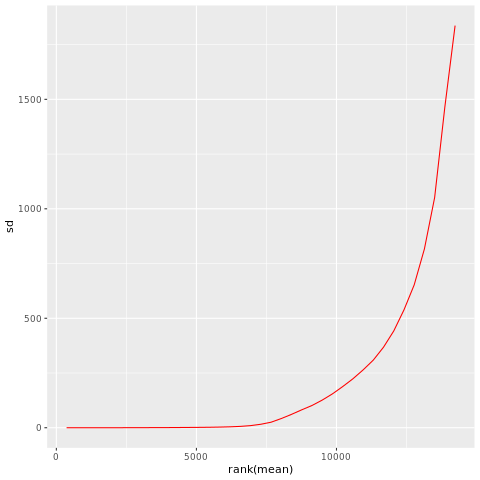

PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyrVarStabTionformation <- tests/<ipython-input-31-1629eba19f77> vsd does not exist, it will be created. Keep calm and wait.
PASSED
pytest_for_deseq2.py::Testpydeseq2::test_pyrlogTransformation <- tests/<ipython-input-31-1629eba19f77> rld exists and it will be loaded
PASSED



Coverage.py warning: Module pydeseq2 was previously imported, but not measured (module-not-measured)


=============================== warnings summary ===============================
tests/pytest_for_deseq2.py::Testpydeseq2::test_pyCreateLibSizedf
  /mnt/home/gervasoni/pydeseq2/src/pydeseq2/_utils.py:158: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
    dds_counts=pd.DataFrame(np.matrix(counts(dds)), columns = colnames(dds), index=rownames(dds))

tests/pytest_for_deseq2.py::Testpydeseq2::test_pyPlotClustering
  /mnt/home/gervasoni/pydeseq2/src/pydeseq2/_plotting.py:272: UserWarning: Warning: You need to set a color condition in intgroup_name field
    warnings.warn("Warning: You need to set a color condition in intgroup_name field")

tests/pytest_for_deseq2.py::Testpydeseq2::test_pyPlotClustering
  /mnt/home/gervasoni/jupyterminiconda3/envs/pyDESeq2_env/lib/python3.8/site-packages/seaborn/

In [32]:
ipytest.run('-svvv')